In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data=pd.read_csv('Cancer data.csv')

In [3]:
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

## Dataset :-

In [5]:
description = ["Age in years","1: male and 0: female","chest pain type -> 1: typical angina and 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]
for i in range(len(description)):
    print(data.columns[i]+"--------->\t\t\t"+description[i])

age--------->			Age in years
sex--------->			1: male and 0: female
cp--------->			chest pain type -> 1: typical angina and 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps--------->			resting blood pressure
chol--------->			 serum cholestoral in mg/dl
fbs--------->			fasting blood sugar > 120 mg/dl
restecg--------->			resting electrocardiographic results (values 0,1,2)
thalach--------->			 maximum heart rate achieved
exang--------->			exercise induced angina
oldpeak--------->			oldpeak = ST depression induced by exercise relative to rest
slope--------->			the slope of the peak exercise ST segment
ca--------->			number of major vessels (0-3) colored by flourosopy
thal--------->			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


### DataSet is clean :-

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Categorical Variables
sex, cp, fbs, restecg, exang, slope, thal

## Numeric Variables
age, trestbps, chol, thalach, oldpeak, ca



##  Data Analysis

In [7]:
data['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

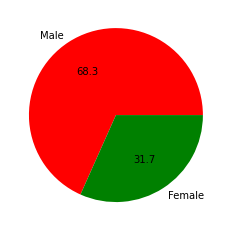

In [8]:
labels = 'Male', 'Female',
l=list(data['sex'].value_counts())
color = ['red', 'green']
plt.pie(l, labels=labels, colors=color,autopct='%1.1f')
plt.show()

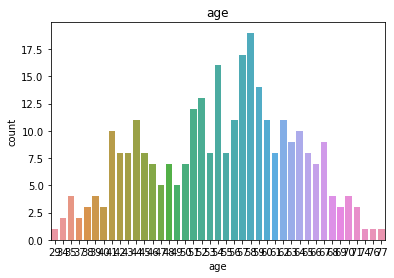

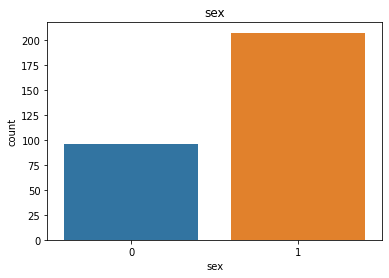

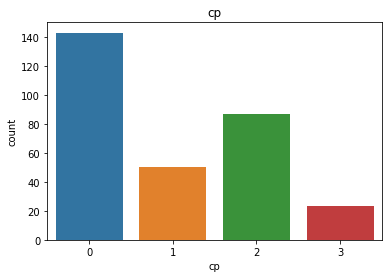

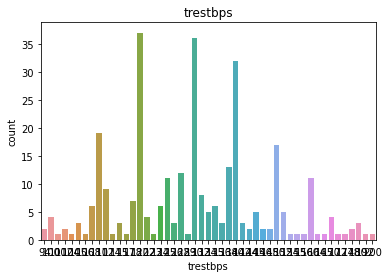

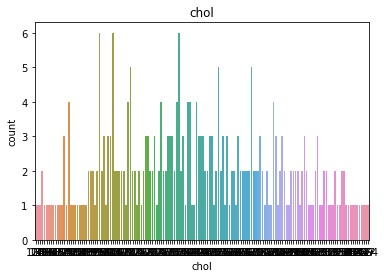

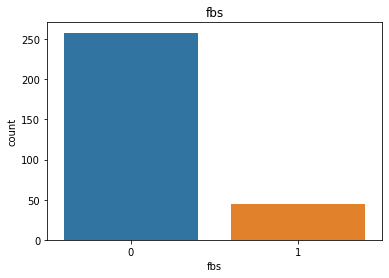

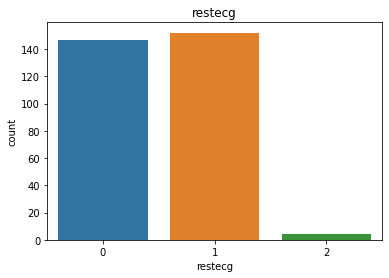

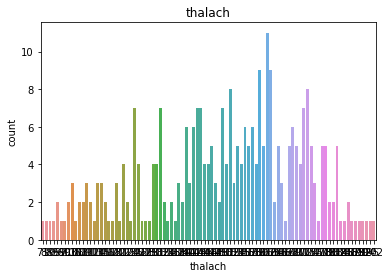

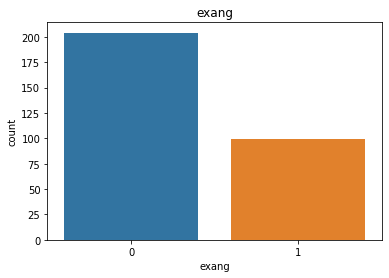

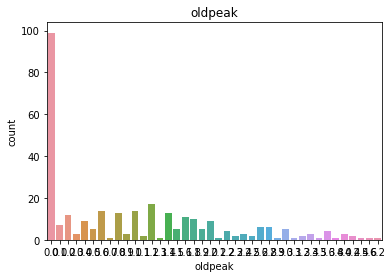

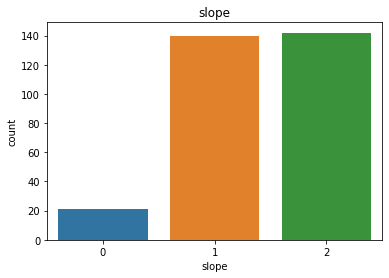

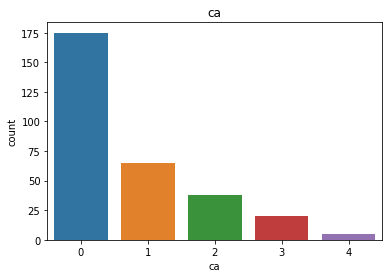

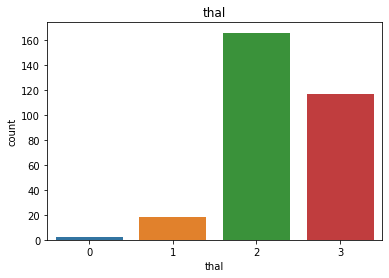

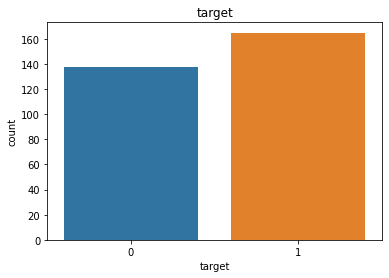

In [9]:

import seaborn as sns
for i in data.columns :
    plt.figure()
    sns.countplot(data[i])
    plt.title(i)

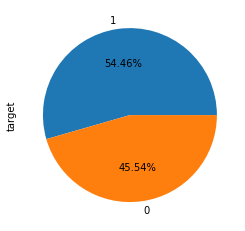

In [10]:
data.target.value_counts().plot.pie(autopct="%0.2f%%")

## Percentage of patients with or without heart problems

In [11]:
noDisease = len(data[data.target == 1])
haveDisease = len(data[data.target == 0])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((noDisease / (len(data.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((haveDisease / (len(data.target))*100)))

Percentage of Patients Haven't Heart Disease: 54.46%
Percentage of Patients Have Heart Disease: 45.54%


## Relation of variables with target variable.

# Age

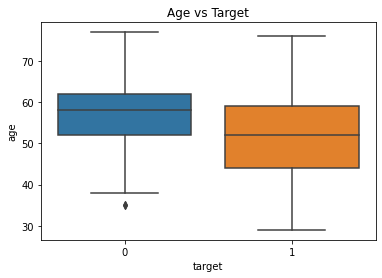

In [12]:
plt.title('Age vs Target')
sns.boxplot(x='target',y='age',data=data)

### People with heart disease are relatively older.

# Gender

C:\Users\This PC\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


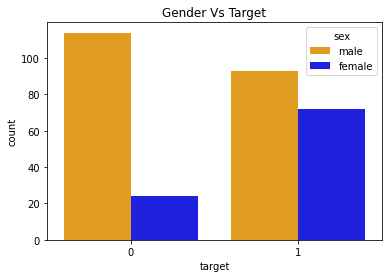

In [13]:
df=data.iloc[:,[1,13]]
df['sex'].replace({1:'male',0:'female'},inplace=True)
plt.title('Gender Vs Target')
sns.countplot(x='target',data=df,hue='sex',palette=['orange','blue'])

#### Males have high risk for disease than female. But our dataset has higher no of males so it could be biased

# Chest pain Type

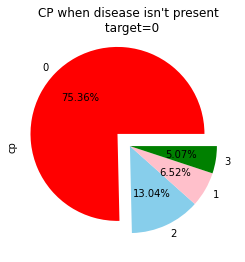

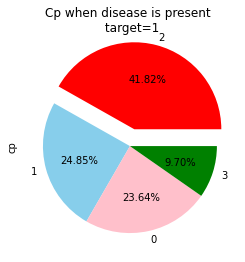

In [14]:

df=data.groupby(['target'])['cp'].value_counts()
explode=(0.2,0,0,0)
df[0].plot.pie(autopct="%0.2f%%",colors=['red','skyblue','pink','green'],explode=explode)
plt.title("CP when disease isn't present \n target=0")
plt.figure()
plt.title("Cp when disease is present \n target=1")
explode=(0.2,0,0,0)
df[1].plot.pie(autopct="%0.2f%%",colors=['red','skyblue','pink','green'],explode=explode)

#### People  with pain type 0(Asymptotic) are at risk while people with type 2(non anginal type) are quite on the safer side.

# trestbps

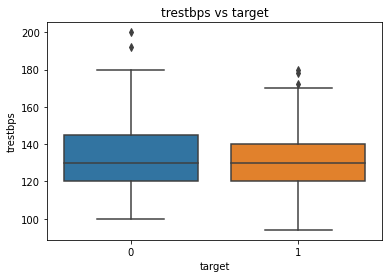

In [15]:
plt.title('trestbps vs target')
sns.boxplot(x='target',y='trestbps',data=data)

#### It doesn't vary much with target

## Chol(serum cholestrol in blood)

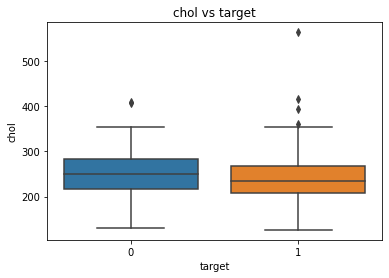

In [16]:
plt.title('chol vs target')
sns.boxplot(x='target',y='chol',data=data)

##### Chol also doesnt vary much with the target so serum cholestrol level isnt a clear indication of heart disease. We also also observe that few people having cholestrol level >350 are safe while one having chol level around 350 is at risk.(These are the outliers) Chol doesnt vary much with the target.i.e serum cholestrol level isnt a clear indication of heart disease. We also also observe that few people having cholestrol level >350 are safe while one having chol level around 350 is at risk.(These are the outliers)

# restecg

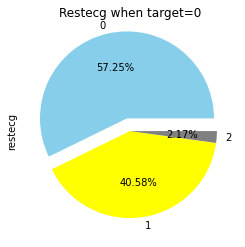

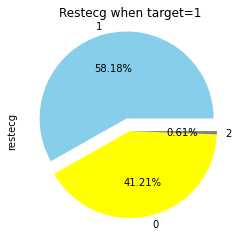

In [17]:

df=data.groupby(['target'])['restecg'].value_counts()
explode=(0.15,0,0)
df[0].plot.pie(autopct="%0.2f%%",colors=['skyblue','yellow','grey'],explode=explode)
plt.title("Restecg when target=0")
plt.figure()
plt.title("Restecg when target=1")
df[1].plot.pie(autopct="%0.2f%%",colors=['skyblue','yellow','grey'],explode=explode)

####  People with type 0 and type 1 have 60%-40% chance of being under risk.

## Thalach (maximum heart rate)

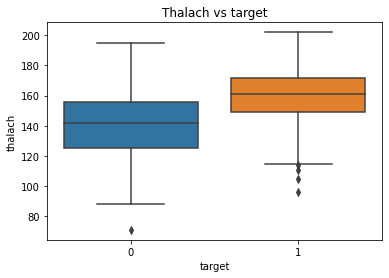

In [18]:
plt.title("Thalach vs target")
sns.boxplot(x='target',y='thalach',data=data)

####  People with heart disease have relatively lower heart rate

# (exang) exercise induced angina

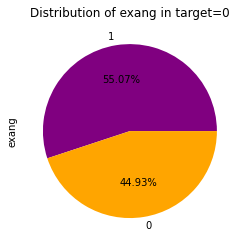

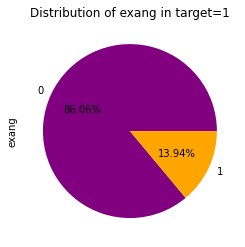

In [19]:
df=data.groupby(['target'])['exang'].value_counts()
plt.title('Distribution of exang in target=0')
df[0].plot.pie(autopct="%0.2f%%",colors=['purple','orange'])
plt.figure()
plt.title('Distribution of exang in target=1')
df[1].plot.pie(autopct="%0.2f%%",colors=['purple','orange'])

##### Exercise induced angina  increase the risk of heart disease with 55% of those who are at risk suffer from exercise induced angina and 86% of diseases free people dont suffer from exercise induced angina.

# fbs(fasting blood sugar levels)

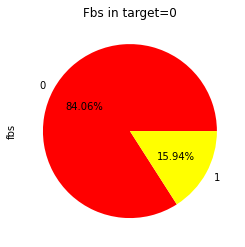

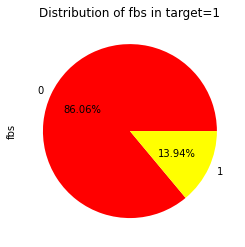

In [20]:
df=data.groupby(['target'])['fbs'].value_counts()
plt.title('Fbs in target=0')
df[0].plot.pie(autopct="%0.2f%%",colors=['red','yellow'])
plt.figure()
plt.title('Distribution of fbs in target=1')
df[1].plot.pie(autopct="%0.2f%%",colors=['red','yellow'])

##### fbs distribution is same. So its not a good predictor


# oldpeak

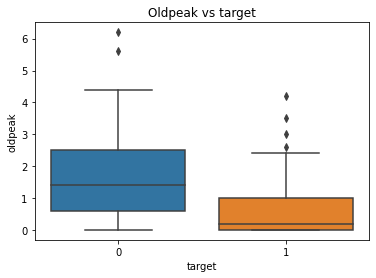

In [21]:
plt.title('Oldpeak vs target')
sns.boxplot(x='target',y='oldpeak',data=data)

####  People with heart diseases have relatively higher oldpeak value than those not having heart disease.

# slope

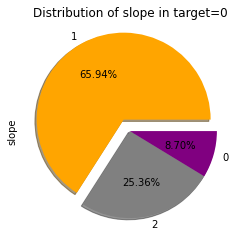

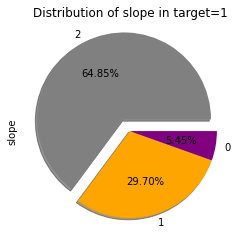

In [22]:

df=data.groupby(['target'])['slope'].value_counts()
plt.title('Distribution of slope in target=0')
explode=(0.15,0,0)
df[0].plot.pie(autopct="%0.2f%%",colors=['orange','grey','purple'],explode=explode,shadow=True)
plt.figure()
plt.title('Distribution of slope in target=1')
df[1].plot.pie(autopct="%0.2f%%",colors=['grey','orange','purple'],explode=explode,shadow=True)

# ca

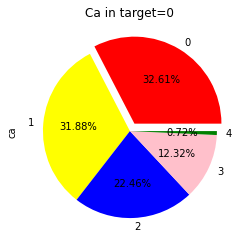

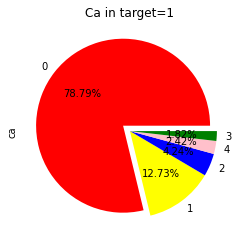

In [23]:
df=data.groupby(['target'])['ca'].value_counts()
plt.title('Ca in target=0')
explode=(0.1,0,0,0,0)
df[0].plot.pie(autopct="%0.2f%%",colors=['red','yellow','blue','pink','green'],explode=explode)
plt.figure()
plt.title('Ca in target=1')
df[1].plot.pie(autopct="%0.2f%%",colors=['red','yellow','blue','pink','green'],explode=explode)

# Relation of predictor variables with each other

# thalach vs age

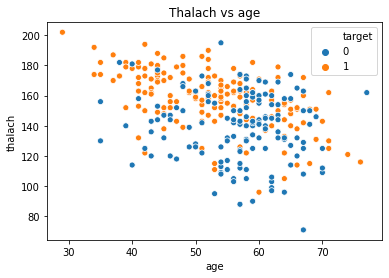

In [24]:
plt.title('Thalach vs age')
sns.scatterplot(x='age',y='thalach',hue='target',data=data)

# thalach vs exang

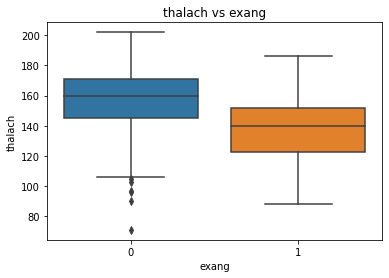

In [25]:
plt.title('thalach vs exang')
sns.boxplot(x='exang',y='thalach',data=data)

# Age vs Max heart rate

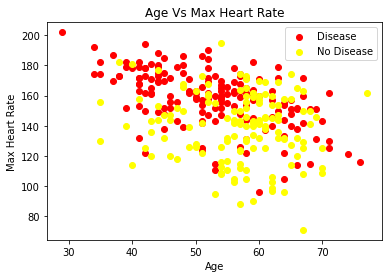

In [26]:
plt.scatter(data.age[data.target==1],data.thalach[data.target==1],color="red");
plt.scatter(data.age[data.target==0],data.thalach[data.target==0],color="yellow");
plt.title("Age Vs Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

# Conclusion

 ## Following are good features : -

- Chestpain(cp)
- exercise induced angina(exang)
- resting ecg(restecg) 
- thal
- thalach
- slope
- ca
- oldpeak

# Correlation matrix to identify relevant variables 

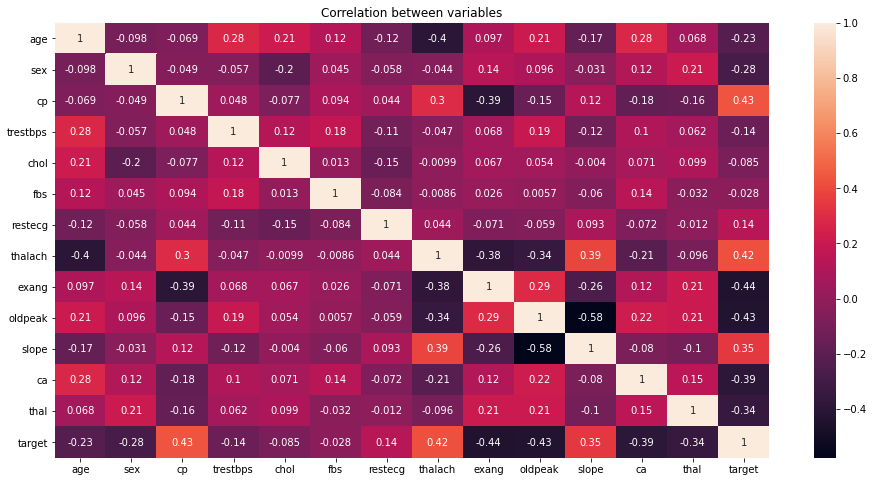

In [27]:
plt.figure(figsize=(16,8))
plt.title('Correlation between variables')
sns.heatmap(data.corr(),annot=True)